In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 이륜차 년도별 사고

In [2]:
data = pd.read_excel('./minidata/이륜차교통사고.xls',header=2)
data

,기준년도,2017,2018,2019,2020,2021
0,사고건수,18241.0,17611.0,20898.0,21258.0,20598.0
1,사망자수,564.0,537.0,498.0,525.0,459.0
2,부상자수,22082.0,21621.0,26514.0,27348.0,26617.0
3,출처) 도로교통공단.&#10;,NaN,NaN,NaN,NaN,NaN


In [3]:
data = data.drop([3])
data

,기준년도,2017,2018,2019,2020,2021
0,사고건수,18241.0,17611.0,20898.0,21258.0,20598.0
1,사망자수,564.0,537.0,498.0,525.0,459.0
2,부상자수,22082.0,21621.0,26514.0,27348.0,26617.0


In [4]:
data =data.set_index('기준년도')
data

,2017,2018,2019,2020,2021
기준년도,,,,,
사고건수,18241.0,17611.0,20898.0,21258.0,20598.0
사망자수,564.0,537.0,498.0,525.0,459.0
부상자수,22082.0,21621.0,26514.0,27348.0,26617.0


In [5]:
data.to_csv('./minidata/사고건수.csv')

### 이륜차 사고유형

In [6]:
type = pd.read_excel('./minidata/이륜차사고유형.xls', header = 2)
type = type.drop([0,1,2,3,70], axis=0)
type

,사고유형대분류,사고유형중분류,사고년도,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
4,차대사람,합계,사고건수,2386,2386,2502,2502,2987,2987,2680,2680,2924,2924
5,차대사람,합계,사망자수,27,27,25,25,31,31,30,30,28,28
6,차대사람,합계,부상자수,2732,2732,2885,2885,3426,3426,3078,3078,3297,3297
7,차대사람,횡단중,사고건수,1603,1603,1288,1288,1547,1547,1352,1352,1521,1521
8,차대사람,횡단중,사망자수,18,18,17,17,18,18,21,21,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,철길건널목,합계,사망자수,-,-,2,2,0,0,1,1,-,-
66,철길건널목,합계,부상자수,-,-,0,0,1,1,0,0,-,-
67,철길건널목,철길건널목,사고건수,-,-,2,2,1,1,1,1,-,-
68,철길건널목,철길건널목,사망자수,-,-,2,2,0,0,1,1,-,-


In [7]:
# 해당 행 삭제
list = ['2017.1','2018.1','2019.1','2020.1','2021.1']
for i in list:
    type = type.drop(f'{i}', axis=1)

type

,사고유형대분류,사고유형중분류,사고년도,2017,2018,2019,2020,2021
4,차대사람,합계,사고건수,2386,2502,2987,2680,2924
5,차대사람,합계,사망자수,27,25,31,30,28
6,차대사람,합계,부상자수,2732,2885,3426,3078,3297
7,차대사람,횡단중,사고건수,1603,1288,1547,1352,1521
8,차대사람,횡단중,사망자수,18,17,18,21,22
...,...,...,...,...,...,...,...,...
65,철길건널목,합계,사망자수,-,2,0,1,-
66,철길건널목,합계,부상자수,-,0,1,0,-
67,철길건널목,철길건널목,사고건수,-,2,1,1,-
68,철길건널목,철길건널목,사망자수,-,2,0,1,-


##### 사고유형대분류별로 사고건수만 추출

- 차대사람

In [8]:
type_ctp = type[type['사고유형대분류'] == '차대사람'][type['사고년도'] == '사고건수']
type_ctp = type_ctp.reset_index(drop=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_13040\3821876589.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_ctp = type[type['사고유형대분류'] == '차대사람'][type['사고년도'] == '사고건수']


In [9]:
type_ctp = type_ctp.drop(['사고년도'], axis=1)
type_ctp

,사고유형대분류,사고유형중분류,2017,2018,2019,2020,2021
0,차대사람,합계,2386,2502,2987,2680,2924
1,차대사람,횡단중,1603,1288,1547,1352,1521
2,차대사람,차도통행중,158,226,261,223,252
3,차대사람,길가장자리구역통행중,73,108,79,64,70
4,차대사람,보도통행중,129,179,239,239,267
5,차대사람,기타,423,701,861,802,814


- 차대차

In [10]:
type_ctc = type[type['사고유형대분류'] == '차대차'][type['사고년도'] == '사고건수']
type_ctc = type_ctc.reset_index(drop=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_13040\311949910.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_ctc = type[type['사고유형대분류'] == '차대차'][type['사고년도'] == '사고건수']


In [11]:
type_ctc = type_ctc.drop(['사고년도'], axis=1)
type_ctc

,사고유형대분류,사고유형중분류,2017,2018,2019,2020,2021
0,차대차,합계,9951,10896,13663,13825,13921
1,차대차,정면충돌,1076,481,633,736,781
2,차대차,측면충돌,5285,5924,7241,6587,6487
3,차대차,추돌,1214,1384,1845,1945,2143
4,차대차,기타,2370,3099,3931,4540,4492
5,차대차,후진중충돌,6,8,13,17,18


- 차량단독

In [12]:
type_c = type[type['사고유형대분류'] == '차량단독'][type['사고년도'] == '사고건수']
type_c =type_c.reset_index(drop=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_13040\3721743260.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_c = type[type['사고유형대분류'] == '차량단독'][type['사고년도'] == '사고건수']


In [13]:
type_c = type_c.drop(['사고년도'], axis=1)
type_c

,사고유형대분류,사고유형중분류,2017,2018,2019,2020,2021
0,차량단독,합계,1393,1632,1816,1774,1530
1,차량단독,공작물충돌,165,377,422,415,343
2,차량단독,주/정차차량 충돌,1,4,10,4,6
3,차량단독,도로이탈,39,76,98,86,65
4,차량단독,기타,263,540,643,629,565
5,차량단독,전도,422,609,632,624,532
6,차량단독,전복,7,26,11,16,19
7,차량단독,전도전복,496,-,-,-,-


In [14]:
# '-' 값 0으로 변환
type_c = type_c.replace('-',0)
type_c = type_c.reset_index(drop=True)

In [15]:
type_c

,사고유형대분류,사고유형중분류,2017,2018,2019,2020,2021
0,차량단독,합계,1393,1632,1816,1774,1530
1,차량단독,공작물충돌,165,377,422,415,343
2,차량단독,주/정차차량 충돌,1,4,10,4,6
3,차량단독,도로이탈,39,76,98,86,65
4,차량단독,기타,263,540,643,629,565
5,차량단독,전도,422,609,632,624,532
6,차량단독,전복,7,26,11,16,19
7,차량단독,전도전복,496,0,0,0,0


- 각 데이터 합계만 붙이기

In [16]:
type_sum = pd.concat([type_ctp.loc[[0]],type_ctc.loc[[0]],type_c.loc[[0]]])
type_sum

,사고유형대분류,사고유형중분류,2017,2018,2019,2020,2021
0,차대사람,합계,2386,2502,2987,2680,2924
0,차대차,합계,9951,10896,13663,13825,13921
0,차량단독,합계,1393,1632,1816,1774,1530


In [17]:
type_sum = type_sum.set_index(['사고유형대분류'])

In [18]:
type_sum = type_sum.drop(['사고유형중분류'], axis=1)
type_sum

,2017,2018,2019,2020,2021
사고유형대분류,,,,,
차대사람,2386,2502,2987,2680,2924
차대차,9951,10896,13663,13825,13921
차량단독,1393,1632,1816,1774,1530


In [19]:
type_sum = type_sum.astype(int)
type_sum

,2017,2018,2019,2020,2021
사고유형대분류,,,,,
차대사람,2386,2502,2987,2680,2924
차대차,9951,10896,13663,13825,13921
차량단독,1393,1632,1816,1774,1530


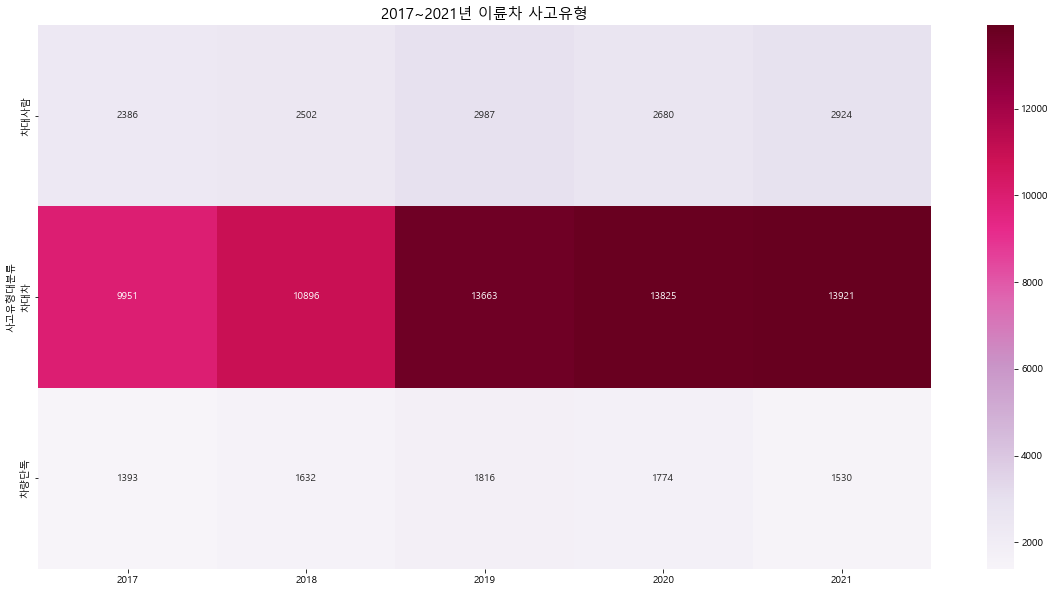

In [20]:
plt.rc('font', family = 'Malgun Gothic', size = 10)
plt.figure(figsize=(20,10))
sns.heatmap(type_sum, annot = True, fmt='.0f', cmap='PuRd')
plt.title('2017~2021년 이륜차 사고유형', fontsize=15)
plt.show()

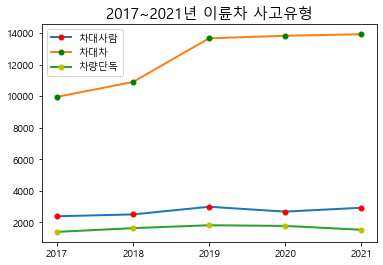

In [21]:
plt.plot(type_sum.T.index,type_sum.T['차대사람'],marker='o', ls='-',
         lw=2, ms=4, mec='r',mew=2, mfc='r', label='차대사람')

plt.plot(type_sum.T.index,type_sum.T['차대차'],marker='o', ls='-',  
         lw=2, ms=4, mec='g',mew=2, mfc='g', label='차대차')

plt.plot(type_sum.T.index,type_sum.T['차량단독'],marker='o', ls='-',  
         lw=2, ms=4, mec='y',mew=2, mfc='y', label='차량단독')
plt.title('2017~2021년 이륜차 사고유형', fontsize=15)

plt.legend()

#### 배달원 증가와 사고건수 비교분석

In [40]:
data

,2017,2018,2019,2020,2021
기준년도,,,,,
사고건수,18241.0,17611.0,20898.0,21258.0,20598.0
사망자수,564.0,537.0,498.0,525.0,459.0
부상자수,22082.0,21621.0,26514.0,27348.0,26617.0


In [23]:
rider = pd.read_csv('./minidata/배달원(전처리).csv')
rider = rider.set_index('년도')


In [24]:
rider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2017 to 2021
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종사자수    5 non-null      int64
dtypes: int64(1)
memory usage: 80.0 bytes


In [25]:
rider = rider.drop([2017], axis=0)
rider

,종사자수
년도,
2018,313000
2019,343000
2020,371000
2021,423000


In [26]:
rider.loc[1819] = rider.loc[2018] + rider.loc[2019]
rider.loc[2021] = rider.loc[2020] + rider.loc[2021]

In [27]:
rider = rider.drop([2018,2019,2020],axis=0)
rider

,종사자수
년도,
2021,794000
1819,656000


In [28]:
case = data.T[['사고건수']]
case = case.drop(['2017'], axis=0)

In [29]:
case

기준년도,사고건수
2018,17611.0
2019,20898.0
2020,21258.0
2021,20598.0


In [30]:
case.loc['1819'] = case.loc['2018'] + case.loc['2019']
case.loc['2021'] = case.loc['2020'] + case.loc['2021']
case

기준년도,사고건수
2018,17611.0
2019,20898.0
2020,21258.0
2021,41856.0
1819,38509.0


In [31]:
case = case.drop(['2018','2019','2020'],axis=0)
case

기준년도,사고건수
2021,41856.0
1819,38509.0


In [32]:
import numpy as np
import scipy.stats as stats

In [33]:
case = case.astype(int)
case.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 2021 to 1819
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사고건수    2 non-null      int32
dtypes: int32(1)
memory usage: 24.0+ bytes


In [34]:
rider = rider.reset_index(drop = True)
case = case.reset_index(drop = True)

In [35]:
table = pd.concat([rider, case], axis=1)

In [36]:
table = table.rename(index = {0 : '2020' , 1 :'2019'})

In [37]:
table = table.reindex(index=['2019','2020'])

In [38]:
table

,종사자수,사고건수
2019,656000,38509
2020,794000,41856


- 종사자수 증가와 사고건수 증가 관련성검사

In [39]:
### 검정
result = stats.chi2_contingency(table.T)

print('검정결과 =', result)
print('검정 통계량 = %.3f, p-value = %.3f' %(result[0], result[1]))  # (오차율, p-v)

# (해석 -검증결과)
# 1. p-value = 0.000 < 0.05 이므로, 귀무가설 기각
# 2. 대립가설 채택 : 종사자수 증가와 사고건수 증가는 관련성이 있다.

검정결과 = (219.91746569768483, 9.427280774622532e-50, 1, array([[658037.82104269, 791962.17895731],
       [ 36471.17895731,  43893.82104269]]))
검정 통계량 = 219.917, p-value = 0.000
